## Group B - Assginment 2

## Problem Statememt

Perform the following operations using Python on the Air quality data sets

a. Data cleaning

b. Data integration

c. Data transformation

d. Error correcting

e. Data model building

In [3]:
import pandas as pd

### Reading data from CSV file

In [4]:
df = pd.read_csv(r"C:\Users\DNYANDEEP\Documents\College\Assignments\DSBDA Lab\airquality.csv")
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,High
2,3,12.0,149.0,12.6,74,5,3,Low
3,4,18.0,313.0,11.5,62,5,4,NaN
4,5,NaN,NaN,14.3,56,5,5,High
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,Low
149,150,NaN,145.0,13.2,77,9,27,Low
150,151,14.0,191.0,14.3,75,9,28,High
151,152,18.0,131.0,8.0,76,9,29,Medium


In [5]:
df.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           2
Temp           0
Month          0
Day            0
Humidity       8
dtype: int64

### Data Cleaning

### Removing unwanted columns

In [6]:
DF = df.drop("Unnamed: 0", axis = 1)

### Replacing numerical null values 

In [7]:
DF["Ozone"] = DF["Ozone"].fillna(DF["Ozone"].mean())
DF["Solar.R"] = DF["Solar.R"].fillna(DF["Solar.R"].mean())
DF["Wind"] = DF["Wind"].fillna(DF["Wind"].mean())

### Replacing categorical null values

In [8]:
DF["Humidity"] = DF["Humidity"].fillna(DF["Humidity"].mode())
DF.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp          int64
Month         int64
Day           int64
Humidity     object
dtype: object

In [9]:
DF.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    8
dtype: int64

### Data Transformation

### Using Label Encoding on Humidity column 

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb = LabelEncoder()

In [12]:
DF["Humidity"] = lb.fit_transform(DF["Humidity"])

In [13]:
DF["Humidity"].unique()

array([0, 1, 3, 2])

In [14]:
DF.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,0
1,36.00000,118.000000,8.0,72,5,2,0
2,12.00000,149.000000,12.6,74,5,3,1
3,18.00000,313.000000,11.5,62,5,4,3
4,42.12931,185.931507,14.3,56,5,5,0


### Data Integration

### Subset Creation ( Row-wise )

In [15]:
#Subset - 1
A1 = DF.iloc[[1,4,7,9,15,28,33],:]
A1

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
1,36.00000,118.000000,8.0,72,5,2,0
4,42.12931,185.931507,14.3,56,5,5,0
7,19.00000,99.000000,13.8,59,5,8,1
9,42.12931,194.000000,8.6,69,5,10,2
15,14.00000,334.000000,11.5,64,5,16,3
28,45.00000,252.000000,14.9,81,5,29,0
33,42.12931,242.000000,16.1,67,6,3,2


In [16]:
#Subset - 2
A2 = DF.iloc[[70,81,95,105,123,137,149],:]
A2

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
70,85.00000,175.000000,7.4,89,7,10,2
81,16.00000,7.000000,6.9,74,7,21,2
95,78.00000,185.931507,6.9,86,8,4,0
105,65.00000,157.000000,9.7,80,8,14,2
123,96.00000,167.000000,6.9,91,9,1,1
137,13.00000,112.000000,11.5,71,9,15,0
149,42.12931,145.000000,13.2,77,9,27,1


In [17]:
merge = pd.concat([A1,A2])
merge

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
1,36.00000,118.000000,8.0,72,5,2,0
4,42.12931,185.931507,14.3,56,5,5,0
7,19.00000,99.000000,13.8,59,5,8,1
9,42.12931,194.000000,8.6,69,5,10,2
15,14.00000,334.000000,11.5,64,5,16,3
28,45.00000,252.000000,14.9,81,5,29,0
33,42.12931,242.000000,16.1,67,6,3,2
70,85.00000,175.000000,7.4,89,7,10,2
81,16.00000,7.000000,6.9,74,7,21,2
95,78.00000,185.931507,6.9,86,8,4,0


### Deriving correlation between Columns

In [18]:
corr = DF.corr()
corr

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
Ozone,1.000000,0.302970,-0.529389,0.608742,0.149081,-0.011355,-0.052122
Solar.R,0.302970,1.000000,-0.059408,0.262569,-0.072904,-0.145621,-0.058406
Wind,-0.529389,-0.059408,1.000000,-0.455128,-0.173857,0.025837,0.071925
Temp,0.608742,0.262569,-0.455128,1.000000,0.420947,-0.130593,-0.229090
Month,0.149081,-0.072904,-0.173857,0.420947,1.000000,-0.007962,-0.115948
Day,-0.011355,-0.145621,0.025837,-0.130593,-0.007962,1.000000,0.040532
Humidity,-0.052122,-0.058406,0.071925,-0.229090,-0.115948,0.040532,1.000000


<AxesSubplot:>

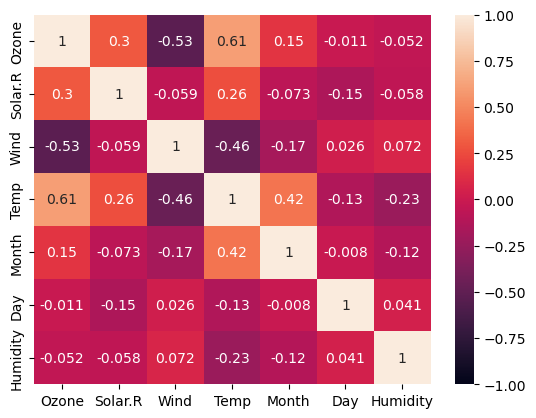

In [19]:
import seaborn as sns
sns.heatmap(corr, vmin = -1, vmax = 1, annot=True)

### Building Data Model

### Using Linear Regression

In [20]:
X = DF[["Ozone"]]
Y = DF[["Temp"]]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
LR = LinearRegression()

In [24]:
model = LR.fit(X_train, Y_train)

In [25]:
Y_predict = model.predict(X_test)

In [26]:
import matplotlib.pyplot as plt

### Plotting Graph

<function matplotlib.pyplot.show(close=None, block=None)>

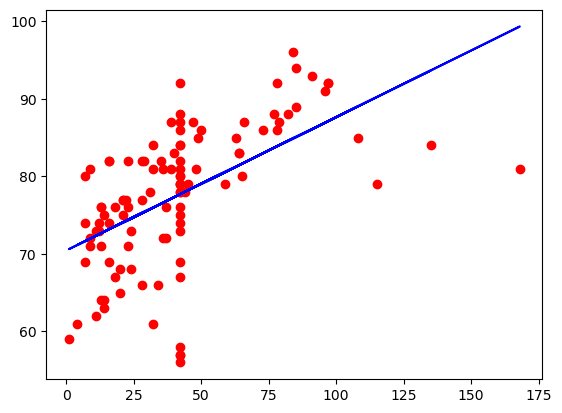

In [27]:
plt.scatter(X_train,Y_train, color="red")
plt.plot(X_train, LR.predict(X_train), color="blue")
plt.show

### Calculating Metrics

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [27]:
mean_square_error = mean_squared_error(Y_test,Y_predict)
print("MSE " ,mean_square_error)

import math
rmse = math.sqrt(mean_square_error)
print("RMSE", rmse)

r2 = r2_score(Y_test,Y_predict)
print("r2  ", r2)

MAE=mean_absolute_error(Y_test,Y_predict)
print("MAE ", MAE)

MSE  68.26402405597275
RMSE 8.262204551811385
r2   0.3513058390445256
MAE  6.557609234920541
